# Geospatial

In [1]:
import mwdata as mw
from mwdata.geospatial.mapping import maps
import geopandas as gpd

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


## Default choropleth map with color selected 

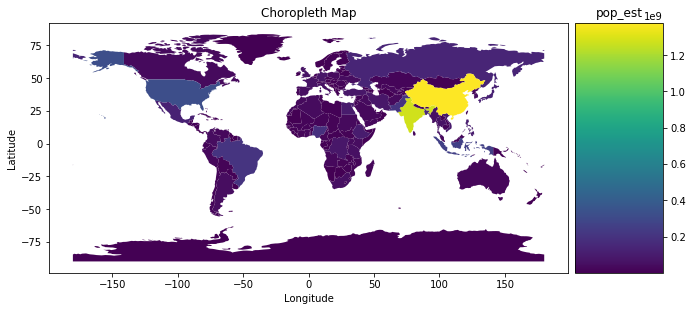

In [3]:
maps(world, color="pop_est")

## Default choropleth map without selecting color

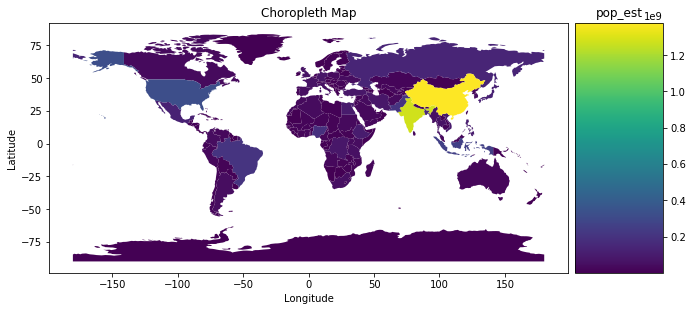

In [4]:
maps(world, color="pop_est")

## KDE map 

In [5]:
#Need to fix
#maps(data=geo, map_type="kde")